# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [2]:
import MeCab

In [3]:
f = open('neko.txt')
lines = f.read()  
f.close()

tagger = MeCab.Tagger()
result = tagger.parse(lines)

f = open('neko.txt.mecab', 'w') 
f.writelines(result) 
f.close()

In [4]:
igfont = {'family':'IPAexGothic'}

# 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [5]:
with open('neko.txt.mecab') as neko_text:
    ans_list = []
    total_ans_list = []
    
    for line in neko_text:
        line = line.split('\t') 
        if len(line) == 1:
            break
        line2 = line[1].split(',')
        
       
        mecab_dict = {
            'surface' : line[0],
            'base' : line2[6],
            'pos' : line2[0],
            'pos1' : line2[1]
        }
        
        ans_list.append(mecab_dict)
        
        if line2[1] == '句点':
            total_ans_list.append(ans_list)
            ans_list = []
total_ans_list[0:10]

[[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
  {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
  {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
  {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
  {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}],
 [{'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
  {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}],
 [{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
  {'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞', 'surface': 'どこ'},
  {'base': 'で', 'pos': '助詞', 'pos1': '格助詞', 'surface': 'で'}

# 31. 動詞
動詞の表層形をすべて抽出せよ．

In [6]:
doushi = []
for lines in total_ans_list:
    for line in lines:
        if line['pos'] == '動詞':
            doushi.append(line['surface'])
            
print(doushi[0:100])

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮', '食う', '思わ', '載せ', 'られ', '持ち上げ', 'られ', 'し', 'あっ', '落ちつい', '見', '見', '思っ', '残っ', 'いる', 'さ', 'れ', 'し', '逢っ', '出会わ', 'し', 'なら', 'し', 'いる', '吹く', 'せ', '弱っ', '飲む', '知っ', '坐っ', 'おっ', 'する', 'し', '始め', '動く', '動く', '分ら', '廻る', 'なる', '助から', '思っ', 'いる', 'さり', 'し', '出', 'し', 'いる', '考え出そ', '分ら', '付い', '見る', 'い', 'おっ', '見え', '隠し', 'しまっ', '違っ', '明い', 'い', 'られ', '這い出し', '見る', '棄て', 'られ', '這い出す', 'ある', '坐っ', 'し', '考え', '見', '出', 'し', '泣い', '来', 'くれる', '考え付い', 'やっ', '見', '来', '渡っ', 'かかる', '減っ', '来', '泣き', '出', 'ある', 'ある', 'し', 'そろ', '廻り']


# 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [7]:
doushi = []
for lines in total_ans_list:
    for line in lines:
        if line['pos'] == '動詞':
            doushi.append(line['base'])
            
print(doushi[0:100])

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'られる', 'する', 'ある', '落ちつく', '見る', '見る', '思う', '残る', 'いる', 'する', 'れる', 'する', '逢う', '出会う', 'する', 'なる', 'する', 'いる', '吹く', 'する', '弱る', '飲む', '知る', '坐る', 'おる', 'する', 'する', '始める', '動く', '動く', '分る', '廻る', 'なる', '助かる', '思う', 'いる', 'さる', 'する', '出る', 'する', 'いる', '考え出す', '分る', '付く', '見る', 'いる', 'おる', '見える', '隠す', 'しまう', '違う', '明く', 'いる', 'られる', '這い出す', '見る', '棄てる', 'られる', '這い出す', 'ある', '坐る', 'する', '考える', '見る', '出る', 'する', '泣く', '来る', 'くれる', '考え付く', 'やる', '見る', '来る', '渡る', 'かかる', '減る', '来る', '泣く', '出る', 'ある', 'ある', 'する', 'そる', '廻る']


# 33. サ変名詞
サ変接続の名詞をすべて抽出せよ

In [8]:
doushi = []
for lines in total_ans_list:
    for line in lines:
        if line['pos'] == '名詞' and line['pos1'] == 'サ変接続':
            doushi.append(line['surface'])
            
print(doushi[0:100])

['見当', '記憶', '話', '装飾', '突起', '運転', '記憶', '分別', '決心', '我慢', '餓死', '訪問', '始末', '猶予', '遭遇', '我慢', '記憶', '返報', '勉強', '勉強', '昼寝', '珍重', '昼寝', '経験', '供', '供', '供', '供', '——', '——', '同居', '観察', '断言', '同衾', '供', '迫害', '尊敬', '生活', '剿滅', '議論', '所有', '憤慨', '観念', '御馳走', '掠奪', '代言', '我儘', '我儘', '失敗', '話', '投書', '関', '決心', '昼寝', '鑑定', '話', '述懐', '想像', '写生', '感心', '昼寝', '失笑', '揶揄', '写生', '欠伸', '自白', '彩色', '写生', '判然', '心中', '感服', '小便', '猶予', '失敬', '欠伸', '予定', '失望', '漫罵', '小便', '増長', '増長', '我儘', '我慢', '報道', '供', '昼寝', '退屈', '加減', '一睡', '運動', '嘆賞', '佇立', '記憶', '珍重', '身動き', '挨拶', '鼓動', '軽蔑', '察', '肥満']


# 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [9]:
no = []
for lines in total_ans_list:
    if len(lines) > 2:
        for i in range(1, len(lines) - 1):
            if lines[i]['surface'] == 'の' and lines[i-1]['pos'] == '名詞' and lines[i+1]['pos'] == '名詞':
                no.append(lines[i-1]['surface'] + 'の' + lines[i+1]['surface'])
            
print(no[0:100])

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', '鼻の下', '吾輩の顔', '自分の住', '吾輩の主人', '家のもの', 'うちのもの', '彼の書斎', '本の上', '皮膚の色', '本の上', '彼の毎夜', '以外のもの', '主人の傍', '彼の膝', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'ここのうち', '供の寝床', '彼等の中間', '供の一', '例の神経', '性の主人', '次の部屋', '自分の勝手', '吾輩の方', '台所の板の間', '吾輩の尊敬', '向の白', '玉のよう', 'そこの家', '家の書生', '裏の池', '親子の愛', 'もっともの議論', '刺の頭', '鰡の臍', '彼等のため', '軍人の家', '代言の主人', '教師の家', '猫の時節', '吾輩の家', '家の主人', 'だらけの英文', '胃弱の癖', '後架の中', '平の宗', '月の月給', '当分の間', '下のよう', '今更のよう', '主人の述懐', '彼の友', '金縁の眼鏡', '主人の顔', '内の想像', '訳のもの', '利の大家', '金縁の裏', '吾輩の後ろ', '彼の友', '吾輩の輪廓', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '不器量の吾輩', '吾輩の主人', '斯産の猫', '斑入りの皮膚']


# 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [10]:
import pandas as pd
from pandas import Series
hindo = []
for lines in total_ans_list:
    for line in lines:
        hindo.append(line['surface'])

h_series = Series(hindo)

h_series.value_counts().head(20)

の     9194
。     7486
て     6873
、     6772
は     6422
に     6268
を     6071
と     5515
が     5339
た     3989
で     3813
「     3231
」     3225
も     2479
ない    2391
だ     2367
し     2328
から    2043
ある    1730
な     1612
dtype: int64

# 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

font = {"family":"AppleGothic"}
plt.rc('font', **font)

df = pd.DataFrame(hindo)

df_10st = h_series.value_counts().head(10)

df_valuecounts = h_series.value_counts()

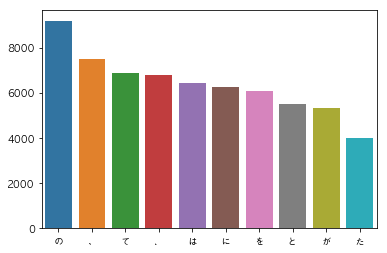

In [12]:
sns.barplot(df_10st.index, df_10st.values)

# 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

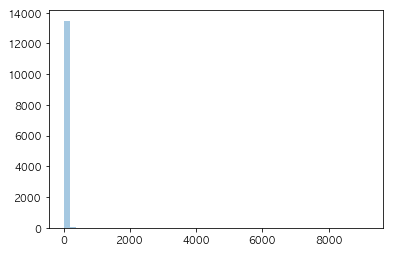

In [13]:
sns.distplot(df_valuecounts,hist=True,kde=False)

# 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

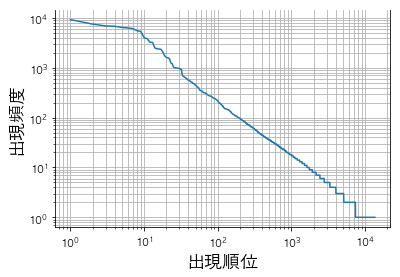

In [14]:
juni = range(1,len(df_valuecounts) + 1)

x = juni
y = df_valuecounts.values

plt.plot(x, y)

ax = plt.gca()
ax.spines['top'].set_color('none')

ax.set_yscale('log')  
ax.set_xscale('log')

plt.xlabel('出現順位',fontsize=18)
plt.ylabel('出現頻度',fontsize=18)

plt.grid(which="both") # グリッド表示。"both"はxy軸両方にグリッドを描く。

plt.show()